<a href="https://colab.research.google.com/github/Afa-Chem/Afa-Chem/blob/main/Cluster_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'><h1><center>**Silicon Clusters using DFT**</center></font>

## <font color='blue'>**Loading the packages**</font>

In [ ]:
pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00


In [ ]:
pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 10.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt install povray

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-povray libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  fonts-povray libsdl1.2debian povray povray-includes
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,739 kB of archives.
After this operation, 5,789 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-povray all 1:3.7.0.8-4build1 [65.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libsdl1.2debian amd64 1.2.15+dfsg2-5 [175 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 povray amd64 1:3.7.0.8-4build1 [1,275 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 povray-includes all 1:3.7.0.8-4build1 [223 kB]
Fetched 1,739 kB in 0s (5,183 kB/s)
Selecting previously unselected

## <font color='blue'>**Initializing of molecule or cluster**</font>

In [ ]:
import pyscf

mol_1 = pyscf.gto.Mole()
mol_1.atom = '''
  Si        0.000000    0.000000    2.004300
  Si        0.000000    0.000000   -2.004300
  Si        0.000000    1.220476    0.000000
  Si        0.000000   -1.220476    0.000000
'''
mol_1.basis = '6-31g'
mol_1.unit = 'AU'
mol_1.build()

In [ ]:
import pyscf

mol_2 = pyscf.gto.Mole()
mol_2.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si4_Opt.xyz"
mol_2.basis = '6-31g' # Basis set to represent the orbitals of atoms
mol_2.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
mol_2.charge = 0 # Charge for the whole system 
mol_2.symmetry = True
mol_2.build()

## <font color='blue'>**Initial Settings**</font>

In [ ]:
# Check cluster coordinates
print(mol_2.atom_coords(unit='Bohr'))

[[ 0.          0.          3.89468314]
 [ 0.          0.         -3.89468314]
 [ 0.          2.43198383  0.        ]
 [ 0.         -2.43198383  0.        ]]


In [ ]:
# Number of Electrons (14x4)

mol_2.nelectron

56

In [ ]:
# Check Spin
mol_2.spin

0

In [ ]:
# Check Charge
mol_2.charge

0

In [ ]:
# Symmetry of the system 
mol_2.groupname

'D2h'

In [ ]:
# Max memory
mol_2.max_memory = 4000 # MB

In [ ]:
from pyscf import gto
gto.format_basis({'Si':'6-31g'})

{'Si': [[0,
   [16115.9, 0.00195948],
   [2425.58, 0.0149288],
   [553.867, 0.0728478],
   [156.34, 0.24613],
   [50.0683, 0.485914],
   [17.0178, 0.325002]],
  [0,
   [292.718, -0.00278094],
   [69.8731, -0.0357146],
   [22.3363, -0.114985],
   [8.15039, 0.0935634],
   [3.13458, 0.603017],
   [1.22543, 0.418959]],
  [0, [1.72738, -0.24463], [0.572922, 0.00431572], [0.222192, 1.09818]],
  [0, [0.0778369, 1.0]],
  [1,
   [292.718, 0.00443826],
   [69.8731, 0.0326679],
   [22.3363, 0.134721],
   [8.15039, 0.328678],
   [3.13458, 0.44964],
   [1.22543, 0.261372]],
  [1, [1.72738, -0.0177951], [0.572922, 0.253539], [0.222192, 0.800669]],
  [1, [0.0778369, 1.0]]]}

In [ ]:
gto.mole.format_ecp({'Si':'lanl2dz'})

{'Si': [10,
  [[-1,
    [[],
     [[505.3137693, -10.0]],
     [[103.2221026, -84.9236087],
      [23.4569248, -30.329941],
      [6.7505693, -12.1049046],
      [2.160314, -1.8945408]],
     [],
     [],
     [],
     []]],
   [0,
    [[[689.4910719, 3.0]],
     [[114.172851, 60.5206833]],
     [[35.7424336, 201.3086137],
      [9.4529586, 65.9399745],
      [2.254359, 19.0300789]],
     [],
     [],
     [],
     []]],
   [1,
    [[[88.9379355, 5.0]],
     [[76.7773538, 6.6413817]],
     [[56.1480987, 247.5972416],
      [21.1874014, 129.371538],
      [6.8277276, 47.4617107],
      [2.1001192, 11.7376574]],
     [],
     [],
     [],
     []]]]]}

# <font color='blue'>**Visualizing the cluster**</font> 🎨

In [ ]:
from ase import Atoms
from ase.io import read, write
import ase.visualize
import numpy as np

# Read File XYZ
si4 = read('/content/gdrive/MyDrive/Colab Notebooks/si4_bohr.xyz')

# Positions and symbols of the file
natoms = len(si4)
positions = si4.positions
positions = np.array(positions, ndmin=3) # This makes it a 3d array
symbols = si4.symbols

ase.visualize.view(si4, viewer="x3d")

In [ ]:
from ase.build.molecule import molecule
#from ase.io.pov import get_bondpairs, set_high_bondorder_pairs

renderer = write('si4.pov', si4, format='pov',rotation='90y', povray_settings=dict(canvas_width=1000))

renderer.render()

PosixPath('/content/si4.png')

# <font color='blue'>**Self-Consistent Field (SCF)**</font> 💻

In KS-DFT, the ground-state wavefunction is expressed as a single Slater determinant $\Phi_0$ of molecular orbitals (MOs, $\phi$), $\Phi_0 = \mathcal{A}|\phi_1(1)\phi_2(2)\dots \phi_n(N)⟩$. The total electronic energy $E = ⟨\Phi_0|\hat{H}|\Phi_0⟩$ is minimized, subject to orbital orthogonality. Hartree-Fock can be solved by the equation

$$\mathbf{FC} = \mathbf{SCE} $$

Where $\mathbf{C}$ is the matrix of molecular orbital coeffients, $\mathbf{E}$ is the diagonal matrix of the corresponding eigenenergies, and $\mathbf{S}$ is the atomic orbital overlap matrix. The Fock matrix $\mathbf{F}$ is defined as 

$$ \mathbf{F} = \mathbf{T} + \mathbf{V} + \mathbf{J} + \mathbf{K}$$

Where $\mathbf{T}$ is the kinetic energy matrix, $\mathbf{V}$ is the external potential, $\mathbf{J}$ is the Coulomb matrixm, and $\mathbf{K}$ is the exchange matrix. 

Kohn-Sham Matrix:
$$ \mathbf{F_{\mu \mu}} = \mathbf{H_{\mu \nu}} + \mathbf{J_{\mu \nu}} + \mathbf{V_{\mu \nu}^{xc}} $$ 

#### **Restricted RHF/RKS**
The spin-orbitals are either alpha (spin-up) or beta (spin-down), and the alpha and beta orbitals share the same spatial orbital. 

#### **Unrestricted UHF/UKS**
The orbitals can have either alpha or beta spin, but the alpha and beta orbitals may have different spatial components. 

In [ ]:
#running SCF calculation
mf_pbe = pyscf.scf.RKS(mol_2).set(xc='pbe').run()

converged SCF energy = -1157.18791512678


In [ ]:
# Running SCF calculation with unrestricted approach
mf_pbe_uks = pyscf.scf.UKS(mol_2).set(xc='pbe').run()

converged SCF energy = -1157.18791512771  <S^2> = 1.2754242e-12  2S+1 = 1


In [ ]:
# Energy components
summary = mf_pbe.scf_summary
print(summary)

{'e1': -2074.671505053193, 'coul': 764.150995799666, 'exc': -82.8715547810465, 'nuc': 236.2041489077951}


In [ ]:
el = summary[list(summary.keys())[0]]
coul = summary[list(summary.keys())[1]]
exc = summary[list(summary.keys())[2]]
nuc = summary[list(summary.keys())[3]]
print('el = ', el)
print('coul = ', coul)   
print('exc = ', exc)
print('nuc = ', nuc)
print('Total Energy = ', el + coul + exc + nuc)                                                           

el =  -2074.671505053193
coul =  764.150995799666
exc =  -82.8715547810465
nuc =  236.2041489077951
Total Energy =  -1157.1879151267785


In [ ]:
# Orbital Energy
orbitals = mf_pbe.mo_energy
print(orbitals)

[-6.54505283e+01 -6.54505223e+01 -6.54272241e+01 -6.54272093e+01
 -5.09473363e+00 -5.09471789e+00 -5.07653688e+00 -5.07649968e+00
 -3.50895722e+00 -3.50895478e+00 -3.50507249e+00 -3.50507170e+00
 -3.50220524e+00 -3.50220180e+00 -3.48942364e+00 -3.48942147e+00
 -3.48643211e+00 -3.48627722e+00 -3.48495016e+00 -3.48494808e+00
 -5.66204635e-01 -4.54580874e-01 -3.83729479e-01 -3.17732054e-01
 -2.45992755e-01 -2.42898085e-01 -2.15204128e-01 -2.05723217e-01
 -1.64422735e-01 -1.25787784e-01 -1.14760127e-01 -8.32369813e-02
 -3.07399697e-02 -2.68896527e-02  1.20763222e-02  2.46459399e-02
  1.65317297e-01  1.96150536e-01  1.97865882e-01  2.03401264e-01
  2.20816879e-01  2.27284916e-01  2.30158543e-01  2.32408904e-01
  2.33888597e-01  2.39266294e-01  2.59682039e-01  2.68996701e-01
  3.01471901e-01  3.08116993e-01  3.19095274e-01  3.26127665e-01]


In [ ]:
# Orbital Occupation
print(mf_pbe_uks.mo_occ)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]))


# <font color='blue'>**Geometry Optimization**</font> 

In [ ]:
pip install geomeTRIC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geomeTRIC: filename=geometric-1.0-py3-none-any.whl size=358353 sha256=f41d7e10891d7c686b6825f39c9f3c7f3894ce2bf75c93a6e322a527835ecbce
  Stored in directory: /root/.cache/pip/wheels/c8/bd/7d/bb40a779e3376a64ed115b6c74bfb47ee4aeffc8d10b157076
Successfully built geomeTRIC


In [ ]:
from pyscf.geomopt.geometric_solver import optimize

conv_params = { # These are the default settings
    'convergence_energy': 1e-6,  # Eh
    'convergence_grms': 3e-4,    # Eh/Bohr   Gradient RMS
    'convergence_gmax': 4.5e-4,  # Eh/Bohr   Gradiente Max
    'convergence_drms': 1.2e-3,  # Angstrom  Displacement RMS
    'convergence_dmax': 1.8e-3,  # Angstrom  Displacement Max
}
#mol_eq = optimize(mf_pbe, **conv_params, maxsteps = 400)
mol_eq = mf_pbe.Gradients().optimizer(solver='geomeTRIC').kernel(conv_params)

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-cdf56845-1c50-40de-b869-e67bc23d2e43.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********      .


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
  Si   0.000000   0.000000   2.060978    0.000000  0.000000  0.000000
  Si   0.000000   0.000000  -2.060978    0.000000  0.000000  0.000000
  Si   0.000000   1.286950   0.000000    0.000000  0.000000  0.000000
  Si   0.000000  -1.286950   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -1157.18791512675
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 Si     0.0000000000     0.0000000000     0.0000223029
1 Si     0.0000000000     0.0000000000    -0.0000223029
2 Si     0.0000000000     0.0000138769     0.0000000000
3 Si     0.0000000000    -0.0000138769     0.0000000000
----------------------------------------------
cycle 1: E = -1157.18791513  dE = -1157.19  norm(grad) = 3.7148e-05


Step    0 : Gradient = 1.857e-05/2.230e-05 (rms/max) Energy = -1157.1879151268
Hessian Eigenvalues: 3.35522e-02 5.00000e-02 5.00000e-02 ... 1.23299e-01 1.23299e-01 1.23828e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
  Si  -0.000000   0.000000   2.060915   -0.000000  0.000000 -0.000063
  Si   0.000000   0.000000  -2.060915    0.000000  0.000000  0.000063
  Si  -0.000000   1.286938   0.000000   -0.000000 -0.000012  0.000000
  Si   0.000000  -1.286938   0.000000    0.000000  0.000012  0.000000
converged SCF energy = -1157.18791513105
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 Si     0.0000000000     0.0000000000     0.0000068394
1 Si     0.0000000000     0.0000000000    -0.0000068394
2 Si     0.0000000000     0.0000054066     0.0000000000
3 Si     0.0000000000    -0.0000054066     0.0000000000
----------------------------------------------
cycle 2: E = -1157.18791513  dE = -4.29191e-09  norm(grad) = 1.23296e-05


Step    1 : Displace = 4.528e-05/6.290e-05 (rms/max) Trust = 1.000e-01 (=) Grad = 6.165e-06/6.839e-06 (rms/max) E (change) = -1157.1879151310 (-4.292e-09) Quality = 1.447
Hessian Eigenvalues: 3.35522e-02 5.00000e-02 5.00000e-02 ... 1.23299e-01 1.23299e-01 1.23828e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 28.892 seconds


In [ ]:
# Optimized Coordinates
coor_opt = mol_eq.atom_coords()
print(coor_opt)

[[ 0.          0.          3.89456428]
 [ 0.          0.         -3.89456428]
 [ 0.          2.43196107  0.        ]
 [ 0.         -2.43196107  0.        ]]


# <font color='blue'>**Properties**</font> 

In [ ]:
import pyscf

# -------  si1
si1 = pyscf.gto.Mole()
si1.atom = "/content/gdrive/MyDrive/Colab Notebooks/si1.xyz"
si1.basis = '6-31g' # Basis set to represent the orbitals of atoms
si1.spin = 2 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si1.charge = 0 # Charge for the whole system 
si1.build()
# -------  si2
si2 = pyscf.gto.Mole()
si2.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si2_Opt.xyz"
si2.basis = '6-31g' # Basis set to represent the orbitals of atoms
si2.spin = 2 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si2.charge = 0 # Charge for the whole system 
si2.build()

# -------  si3
si3 = pyscf.gto.Mole()
si3.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si3_Opt.xyz"
si3.basis = '6-31g' # Basis set to represent the orbitals of atoms
si3.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si3.charge = 0 # Charge for the whole system 
si3.build()
# -------  si4
si4 = pyscf.gto.Mole()
si4.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si4_Opt.xyz"
si4.basis = '6-31g' # Basis set to represent the orbitals of atoms
si4.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si4.charge = 0 # Charge for the whole system 
si4.build()
# -------  si5
si5 = pyscf.gto.Mole()
si5.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si5_Opt.xyz"
si5.basis = '6-31g' # Basis set to represent the orbitals of atoms
si5.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si5.charge = 0 # Charge for the whole system 
si5.build()
# -------  si6
si6 = pyscf.gto.Mole()
si6.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si6_Opt.xyz"
si6.basis = '6-31g' # Basis set to represent the orbitals of atoms
si6.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si6.charge = 0 # Charge for the whole system 
si6.build()
# -------  si7
si7 = pyscf.gto.Mole()
si7.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si7_Opt.xyz"
si7.basis = '6-31g' # Basis set to represent the orbitals of atoms
si7.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si7.charge = 0 # Charge for the whole system 
si7.build()
# -------  si8
si8 = pyscf.gto.Mole()
si8.atom = "/content/gdrive/MyDrive/Colab Notebooks/Si8_Opt.xyz"
si8.basis = '6-31g' # Basis set to represent the orbitals of atoms
si8.spin = 0 # Mole.spin is the number of unpaired electrons 2S, i.e. the difference between the number of alpha and beta electrons.
si8.charge = 0 # Charge for the whole system 
si8.build()

In [ ]:
mf_si1 = pyscf.scf.UKS(si1).set(xc='pbe').run()
mf_si2 = pyscf.scf.UKS(si2).set(xc='pbe').run()
mf_si3 = pyscf.scf.RKS(si3).set(xc='pbe').run()
mf_si4 = pyscf.scf.RKS(si4).set(xc='pbe').run()
mf_si5 = pyscf.scf.RKS(si5).set(xc='pbe').run()
mf_si6 = pyscf.scf.RKS(si6).set(xc='pbe').run()
mf_si7 = pyscf.scf.RKS(si7).set(xc='pbe').run()
mf_si8 = pyscf.scf.RKS(si8).set(xc='pbe').run()

converged SCF energy = -289.198910824423  <S^2> = 2.0000011  2S+1 = 3.0000007
converged SCF energy = -578.507733081168  <S^2> = 2.0013066  2S+1 = 3.0008709
converged SCF energy = -867.841928902121
converged SCF energy = -1157.18791512678
converged SCF energy = -1446.5130728305
converged SCF energy = -1735.84410717015
converged SCF energy = -2025.18408149698
converged SCF energy = -2314.47864058627


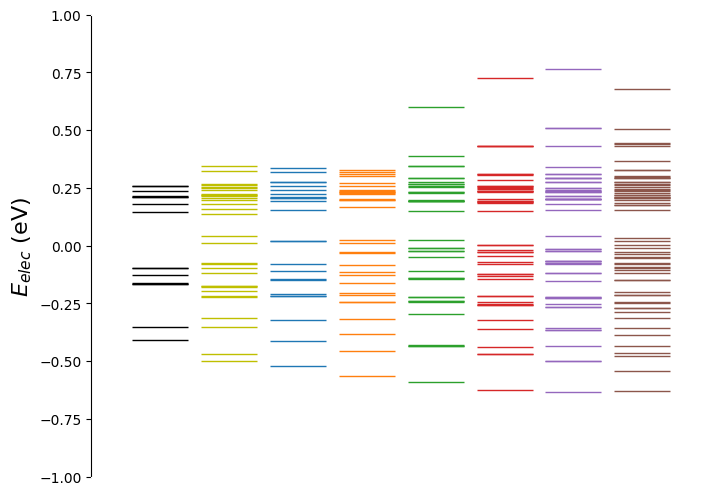

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_si1 = mf_si1.mo_energy
y_si2 = mf_si2.mo_energy
y_si3 = mf_si3.mo_energy
y_si4 = mf_si4.mo_energy
y_si5 = mf_si5.mo_energy
y_si6 = mf_si6.mo_energy
y_si7 = mf_si7.mo_energy
y_si8 = mf_si8.mo_energy

x_si1 = np.repeat(0.0, len(y_si1))
x_si2 = np.repeat(0.5, len(y_si2))
x_si3 = np.repeat(1.0, len(y_si3))
x_si4 = np.repeat(1.5, len(y_si4))
x_si5 = np.repeat(2.0, len(y_si5))
x_si6 = np.repeat(2.5, len(y_si6))
x_si7 = np.repeat(3.0, len(y_si7))
x_si8 = np.repeat(3.5, len(y_si8))

fig = plt.figure(figsize=(8,6), facecolor='white')
ax = plt.axes(facecolor='white')
ax.plot(x_si1, y_si1, 'k_', markersize=40, markeredgewidth=1)
ax.plot(x_si2, y_si2, 'y_', markersize=40, markeredgewidth=1)
ax.plot(x_si3, y_si3, '_', markersize=40, markeredgewidth=1)
ax.plot(x_si4, y_si4, '_', markersize=40, markeredgewidth=1)
ax.plot(x_si5, y_si5, '_', markersize=40, markeredgewidth=1)
ax.plot(x_si6, y_si6, '_', markersize=40, markeredgewidth=1)
ax.plot(x_si7, y_si7, '_', markersize=40, markeredgewidth=1)
ax.plot(x_si8, y_si8, '_', markersize=40, markeredgewidth=1)
ax.xaxis.set_visible(False)
ax.set_ylim((-1,1))
ax.set_xlim((-0.5,4.0))
ax.spines['bottom'].set_color('white') 
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white') 
ax.set_ylabel('$E_{elec}$ (eV)', weight ='normal', size = 16)
plt.savefig('energy_orbitals.jpg',dpi=600,bbox_inches='tight' )
plt.show()

# <font color='blue'>**Molecular Dynamics - NVE**</font> 

### **Ergodic Hypothesis**


$$ \lim_{t → ∞} \dfrac{1}{t} \int_0^t f(\omega(t)) dt = \int_{\Omega} f(\omega) P(\omega) d\omega$$


Average along a long trajectory is equal to average over all possible states. Where $\omega (t)$ is the state variable (configuration at time), $\Omega$ is the state space (set of possible configurations), $f(\omega (t))$ is the observable, and $P(\omega)$ is the Probability Density Function. 

Non-ergodic process depends on trajectory. 

*NVE ensemble:* Microcanonic ensemble, N, V, E constant. 



### **Time integrators**

Taylor serie: 

$$  f(t) = f(t) + \bigg (\dfrac{df}{dt} \bigg)_{t_0} (t-t_0) + \dfrac{1}{2!} \bigg (\dfrac{df}{dt} \bigg)_{t_0}^2 (t-t_0)^2 +  \cdots $$

Usually, $\Delta t = 1$ fs produces good results. 

The MD module in PySCF supports the Velocity-Verlet integration scheme in the NVE ensemble. The positions are evolved according to:

$$ \mathbf{r}(t_{i+1}) = \mathbf{r}(t_i) + (\delta t) \mathbf{v}(t_i) + \frac{1}{2}(\delta t)^2 \mathbf{a}(t_i)  $$

and the velocities are evolved as 

$$\mathbf{v}(t_{i+1}) = \mathbf{v}(t_i) + (\delta t) \frac{\mathbf{a}(t_{i+1}) + \mathbf{a}(t_i)}{2}$$

In [ ]:
import numpy as np

natom = 4  # Number of atoms

# Create a 2D array with shape (natm, 3)
#array_2d = np.array(np.random.randn(natm, 3))  #size is rows and columns
array_2d = np.random.uniform(0.0, 1.0, size=(natom, 3))

In [ ]:
#!/usr/bin/env python

'''
A simple example to run an NVE BOMD simulation.
'''

import pyscf.md


# Runnig the molecyular dynamics
myintegrator = pyscf.md.NVE(mf_pbe,
                            dt=41,  # Atomic Units of time
                            steps=10,
                            veloc = array_2d,
                            energy_output="BOMD.md.energies",
                            trajectory_output="BOMD.md.xyz").run()

# Close the file streams for the energy and trajectory.
myintegrator.energy_output.close()
myintegrator.trajectory_output.close()

overwrite energy output file: BOMD.md.energies
overwrite energy output file: BOMD.md.xyz

BOMD Time 0.00
converged SCF energy = -1157.18791512674
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 Si     0.0000000000     0.0000000000     0.0000214340
1 Si     0.0000000000     0.0000000000    -0.0000214340
2 Si     0.0000000000     0.0000146944     0.0000000000
3 Si     0.0000000000    -0.0000146944     0.0000000000
----------------------------------------------
----------- VelocityVerlet final geometry -----------
         x                y                z
0 Si     0.0000000000     0.0000000000     3.8946831373
1 Si     0.0000000000     0.0000000000    -3.8946831373
2 Si     0.0000000000     2.4319838297     0.0000000000
3 Si     0.0000000000    -2.4319838297     0.0000000000
----------------------------------------------
------------ VelocityVerlet final velocity -----------
         x                y                z
0 Si     0.259

RuntimeError: ignored

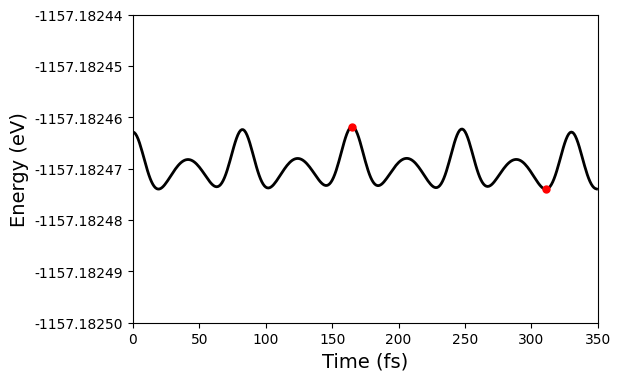

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

md_out=np.loadtxt("/content/gdrive/MyDrive/Colab Notebooks/BOMD_350.md.energies",skiprows=1)

time = md_out[:,0]/41
energy = md_out[:,3]

energy_min = np.argmin(energy)
energy_max = np.argmax(energy)


plt.figure(figsize=(6,4))
plt.plot(time, energy, '-k', linewidth=2)
plt.plot(energy_min, min(energy), 'or', markersize=5)
plt.plot(energy_max, max(energy), 'or', markersize=5)
plt.xlabel('Time (fs)', weight = 'normal', size = 14)
plt.ylabel('Energy (eV)', weight ='normal', size = 14)
plt.ylim((-1157.1825,-1157.18244))
plt.xlim((0,350))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
#plt.annotate('min',size=9, color='red', xy=(x_min,min(energy)), xytext=(x_min,min(energy)- 0.000004),horizontalalignment='center', verticalalignment='bottom')
#plt.annotate('max',size=9, color='red', xy=(x_max,max(energy)), xytext=(x_max,max(energy)+0.000001),horizontalalignment='center', verticalalignment='bottom')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: .5f}')) # 5 decimal places
plt.savefig('md_energy.jpg',dpi=600,bbox_inches='tight' )
plt.show()

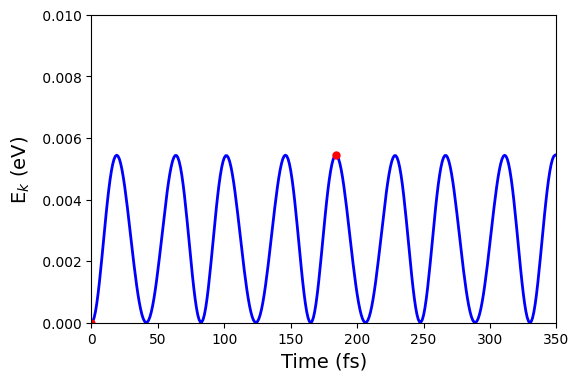

In [ ]:
kin = md_out[:,2]

x_min = np.argmin(kin)
x_max = np.argmax(kin)

plt.figure(figsize=(6,4))
plt.plot(time, kin, '-b', linewidth=2)
plt.plot(x_min, min(kin), 'or', markersize=5)
plt.plot(x_max, max(kin), 'or', markersize=5)
plt.xlabel('Time (fs)', weight = 'normal', size = 14)
plt.ylabel('E$_k$ (eV)', weight ='normal', size = 14)
plt.ylim((0.00,0.01))
plt.xlim((0,350))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
#plt.annotate('min',size=9, color='red', xy=(x_min,min(energy)), xytext=(x_min,min(energy)- 0.000004),horizontalalignment='center', verticalalignment='bottom')
#plt.annotate('max',size=9, color='red', xy=(x_max,max(energy)), xytext=(x_max,max(energy)+0.000001),horizontalalignment='center', verticalalignment='bottom')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: .3f}')) # 3 decimal places
plt.savefig('md_kin.jpg',dpi=600,bbox_inches='tight' )
plt.show()

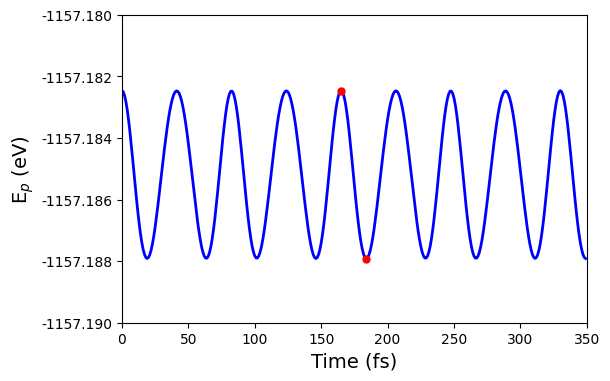

In [ ]:
pot = md_out[:,1]

x_min = np.argmin(pot)
x_max = np.argmax(pot)

plt.figure(figsize=(6,4))
plt.plot(time, pot, '-b', linewidth=2)
plt.plot(x_min, min(pot), 'or', markersize=5)
plt.plot(x_max, max(pot), 'or', markersize=5)
plt.xlabel('Time (fs)', weight = 'normal', size = 14)
plt.ylabel('E$_p$ (eV)', weight ='normal', size = 14)
plt.ylim((-1157.19,-1157.18))
plt.xlim((0,350))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
#plt.annotate('min',size=9, color='red', xy=(x_min,min(energy)), xytext=(x_min,min(energy)- 0.000004),horizontalalignment='center', verticalalignment='bottom')
#plt.annotate('max',size=9, color='red', xy=(x_max,max(energy)), xytext=(x_max,max(energy)+0.000001),horizontalalignment='center', verticalalignment='bottom')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: .3f}')) # 3 decimal places
plt.savefig('md_pot.jpg',dpi=600,bbox_inches='tight' )
plt.show()